### 1. Khai báo thư viện 

In [67]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn-v0_8-darkgrid')

---

### 2. Tải tệp dữ liệu

In [68]:
data = pd.read_csv('data/shopping_behavior_updated.csv')


ở bước này chúng ta sẽ kiểm tra thử quá trình tải tệp dữ liệu có bị lỗi hoặc tải nhầm tệp dữ liệu hay không

In [69]:
data

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


---

### 3. Viewing and Describing the data

In [70]:
data.shape

(3900, 18)

Viewing Column names of the dataset using `columns`

In [71]:
for i,col in enumerate(data.columns):
    print(f'Column number {1+i} is {col}')

Column number 1 is CustomerID
Column number 2 is Age
Column number 3 is Gender
Column number 4 is Item Purchased
Column number 5 is Category
Column number 6 is Purchase Amount (USD)
Column number 7 is Location
Column number 8 is Size
Column number 9 is Color
Column number 10 is Season
Column number 11 is Review Rating
Column number 12 is Subscription Status
Column number 13 is Shipping Type
Column number 14 is Discount Applied
Column number 15 is Promo Code Used
Column number 16 is Previous Purchases
Column number 17 is Payment Method
Column number 18 is Frequency of Purchases


View datatypes of each column in the dataset using `dtype`.

In [72]:
data.dtypes

CustomerID                  int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

Gathering Further information about the dataset using `info()`

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Describing the data as basic statistics using `describe()`

In [74]:
data.describe()

,CustomerID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### 4. Checking the data for inconsistencies and further cleaning the data if needed.

Checking data for missing values using `isnull()`.

In [75]:
data.isnull()

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3897,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Checking summary of missing values

In [76]:
data.isnull().sum()

CustomerID                0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [77]:
for i, col in enumerate(data.columns):
    if data[col].dtype == 'object':  # Chỉ lấy các cột có kiểu object
        print(f'Column number {i+1} is {col}')


Column number 3 is Gender
Column number 4 is Item Purchased
Column number 5 is Category
Column number 7 is Location
Column number 8 is Size
Column number 9 is Color
Column number 10 is Season
Column number 12 is Subscription Status
Column number 13 is Shipping Type
Column number 14 is Discount Applied
Column number 15 is Promo Code Used
Column number 17 is Payment Method
Column number 18 is Frequency of Purchases


In [78]:
for i, col in enumerate(data.columns):
    if data[col].dtype == 'object':  # Chỉ lấy các cột có kiểu object
        unique_count = data[col].nunique()  # Số lượng giá trị duy nhất
        print(f'Column number {i+1} is "{col}" with {unique_count} unique values')

        # Hiển thị số lần xuất hiện của từng giá trị
        print(data[col].value_counts(), "\n" + "-"*50)


Column number 3 is "Gender" with 2 unique values
Gender
Male      2652
Female    1248
Name: count, dtype: int64 
--------------------------------------------------
Column number 4 is "Item Purchased" with 25 unique values
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64 
--------------------------------------------------
Column number 5 is "Category" with 4 unique values
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 
--------------------------------------------------
Column number 7 i

In [79]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if data[col].dtype == 'object':  # Chỉ áp dụng cho cột object
        unique_values = data[col].nunique()  # Đếm số lượng giá trị duy nhất
        
        le = LabelEncoder()  
        data[col] = le.fit_transform(data[col])  # Ánh xạ giá trị thành số
        
        print(f'Column "{col}" has {unique_values} unique values and has been encoded.')

Column "Gender" has 2 unique values and has been encoded.
Column "Item Purchased" has 25 unique values and has been encoded.
Column "Category" has 4 unique values and has been encoded.
Column "Location" has 50 unique values and has been encoded.
Column "Size" has 4 unique values and has been encoded.
Column "Color" has 25 unique values and has been encoded.
Column "Season" has 4 unique values and has been encoded.
Column "Subscription Status" has 2 unique values and has been encoded.
Column "Shipping Type" has 6 unique values and has been encoded.
Column "Discount Applied" has 2 unique values and has been encoded.
Column "Promo Code Used" has 2 unique values and has been encoded.
Column "Payment Method" has 6 unique values and has been encoded.
Column "Frequency of Purchases" has 7 unique values and has been encoded.


In [80]:
data

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5,3
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1,3
2,3,50,1,11,1,73,20,2,12,1,3.1,1,2,1,1,23,2,6
3,4,21,1,14,2,90,38,1,12,1,3.5,1,3,1,1,49,4,6
4,5,45,1,2,1,49,36,1,21,1,2.7,1,2,1,1,31,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,0,9,1,28,45,0,21,2,4.2,0,0,0,0,32,5,6
3896,3897,52,0,0,0,49,14,0,23,1,4.5,0,5,0,0,41,0,1
3897,3898,46,0,1,0,33,29,0,8,1,2.9,0,4,0,0,24,5,5
3898,3899,44,0,17,2,77,22,2,3,2,3.8,0,1,0,0,24,5,6


NOTE : Data doesnt have any missing values so it is clean, and therefore no need for cleaning the data

### 5. Understanding and Visualizing Data

Finding and viewing Corelations in the data and columns using `corr()`.

In [81]:
corr = data.corr()
corr

,CustomerID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
CustomerID,1.000000,-0.004079,-0.807960,0.003648,-0.004133,0.011048,-0.013257,-0.001801,-0.011144,-0.018027,0.001343,-0.768960,-0.020979,-0.857496,-0.857496,-0.039159,-0.015504,-0.012250
Age,-0.004079,1.000000,0.002763,-0.000636,0.003546,-0.010424,-0.001957,-0.023654,0.006700,-0.028418,-0.021949,0.006492,-0.010743,0.004366,0.004366,0.040445,-0.005215,0.017406
Gender,-0.807960,0.002763,1.000000,0.001921,-0.004144,-0.014044,0.000747,0.018764,-0.000560,0.016258,0.008164,0.417197,0.016490,0.595823,0.595823,0.035873,0.003369,0.012829
Item Purchased,0.003648,-0.000636,0.001921,1.000000,0.052951,-0.005342,0.020390,-0.008942,0.027241,0.012755,-0.004621,0.003028,0.016244,-0.013983,-0.013983,-0.001513,-0.006695,0.015249
Category,-0.004133,0.003546,-0.004144,0.052951,1.000000,-0.017841,0.000541,-0.035916,0.009119,0.000141,-0.000299,0.011022,-0.009031,0.000572,0.000572,-0.015669,-0.000776,0.012190
Purchase Amount (USD),0.011048,-0.010424,-0.014044,-0.005342,-0.017841,1.000000,0.028803,0.027805,-0.004326,-0.018358,0.030776,-0.006996,-0.024637,-0.017798,-0.017798,0.008063,-0.009077,-0.017219
Location,-0.013257,-0.001957,0.000747,0.020390,0.000541,0.028803,1.000000,0.000275,-0.004944,0.012259,-0.004222,0.004529,-0.001458,0.011926,0.011926,-0.032962,-0.006931,-0.012740
Size,-0.001801,-0.023654,0.018764,-0.008942,-0.035916,0.027805,0.000275,1.000000,-0.005124,-0.009286,0.027603,-0.014501,0.001020,-0.001804,-0.001804,-0.011152,-0.033220,-0.008860
Color,-0.011144,0.006700,-0.000560,0.027241,0.009119,-0.004326,-0.004944,-0.005124,1.000000,-0.000109,0.027356,0.021333,-0.000034,0.019394,0.019394,0.000418,-0.007578,-0.009938
Season,-0.018027,-0.028418,0.016258,0.012755,0.000141,-0.018358,0.012259,-0.009286,-0.000109,1.000000,0.000160,-0.005139,0.019122,0.015550,0.015550,0.024333,-0.005520,0.009568


Plotting the heatmap of correlation of all the columns of the dataset.

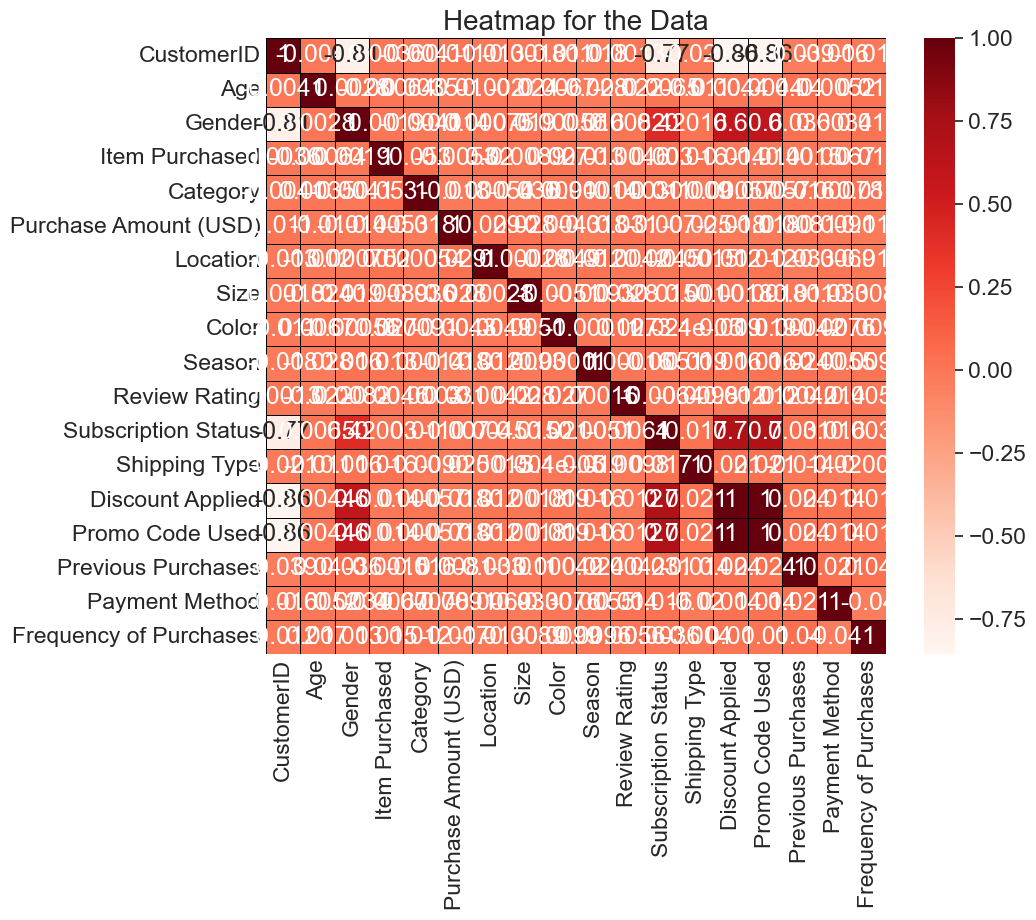

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

#### 5.1. Gender Data Visualization

First we take a look at the gender column of the dataset.

In [83]:
data['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

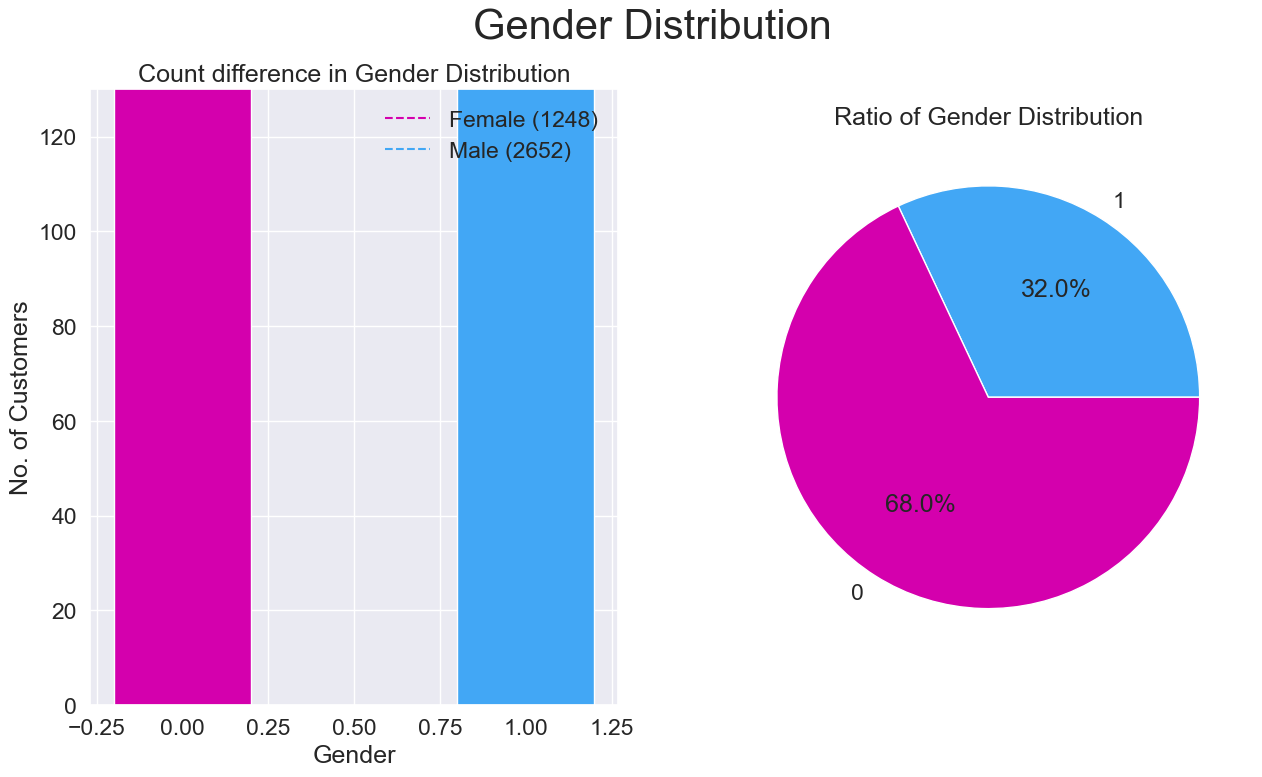

In [84]:
labels=data['Gender'].unique()
values=data['Gender'].value_counts(ascending=True)


fig, (ax0,ax1) = plt.subplots(ncols=2,figsize=(15,8))
bar = ax0.bar(x=labels, height=values, width=0.4, align='center', color=['#42a7f5','#d400ad'])
ax0.set(title='Count difference in Gender Distribution',xlabel='Gender', ylabel='No. of Customers')
ax0.set_ylim(0,130)
ax0.axhline(y=data['Gender'].value_counts()[0], color='#d400ad', linestyle='--', label=f'Female ({data.Gender.value_counts()[0]})')
ax0.axhline(y=data['Gender'].value_counts()[1], color='#42a7f5', linestyle='--', label=f'Male ({data.Gender.value_counts()[1]})')
ax0.legend()


ax1.pie(values,labels=labels,colors=['#42a7f5','#d400ad'],autopct='%1.1f%%')
ax1.set(title='Ratio of Gender Distribution')
fig.suptitle('Gender Distribution', fontsize=30);
plt.show()

#### 5.2. Age Data Visualization

Visualizing Statistical Description of the Age on a boxplot.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19532\3887709188.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19532\3887709188.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19532\3887709188.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future vers

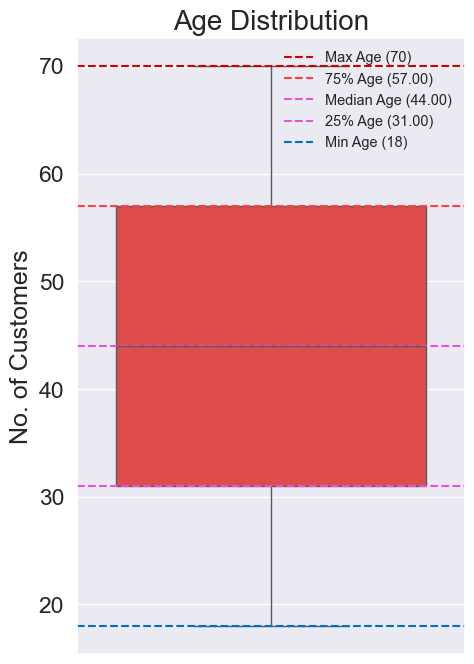

In [85]:
fig, ax = plt.subplots(figsize=(5,8))
sns.set(font_scale=1.5)
ax = sns.boxplot(y=data["Age"], color="#f73434")
ax.axhline(y=data['Age'].max(), linestyle='--',color='#c90404', label=f'Max Age ({data.Age.max()})')
ax.axhline(y=data['Age'].describe()[6], linestyle='--',color='#f74343', label=f'75% Age ({data.Age.describe()[6]:.2f})')
ax.axhline(y=data['Age'].median(), linestyle='--',color='#eb50db', label=f'Median Age ({data.Age.median():.2f})')
ax.axhline(y=data['Age'].describe()[4], linestyle='--',color='#eb50db', label=f'25% Age ({data.Age.describe()[4]:.2f})')
ax.axhline(y=data['Age'].min(), linestyle='--',color='#046ebf', label=f'Min Age ({data.Age.min()})')
ax.legend(fontsize='xx-small', loc='upper right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

Counts of first five max age in the Age Column.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19532\86286687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['Age'], palette='spring')


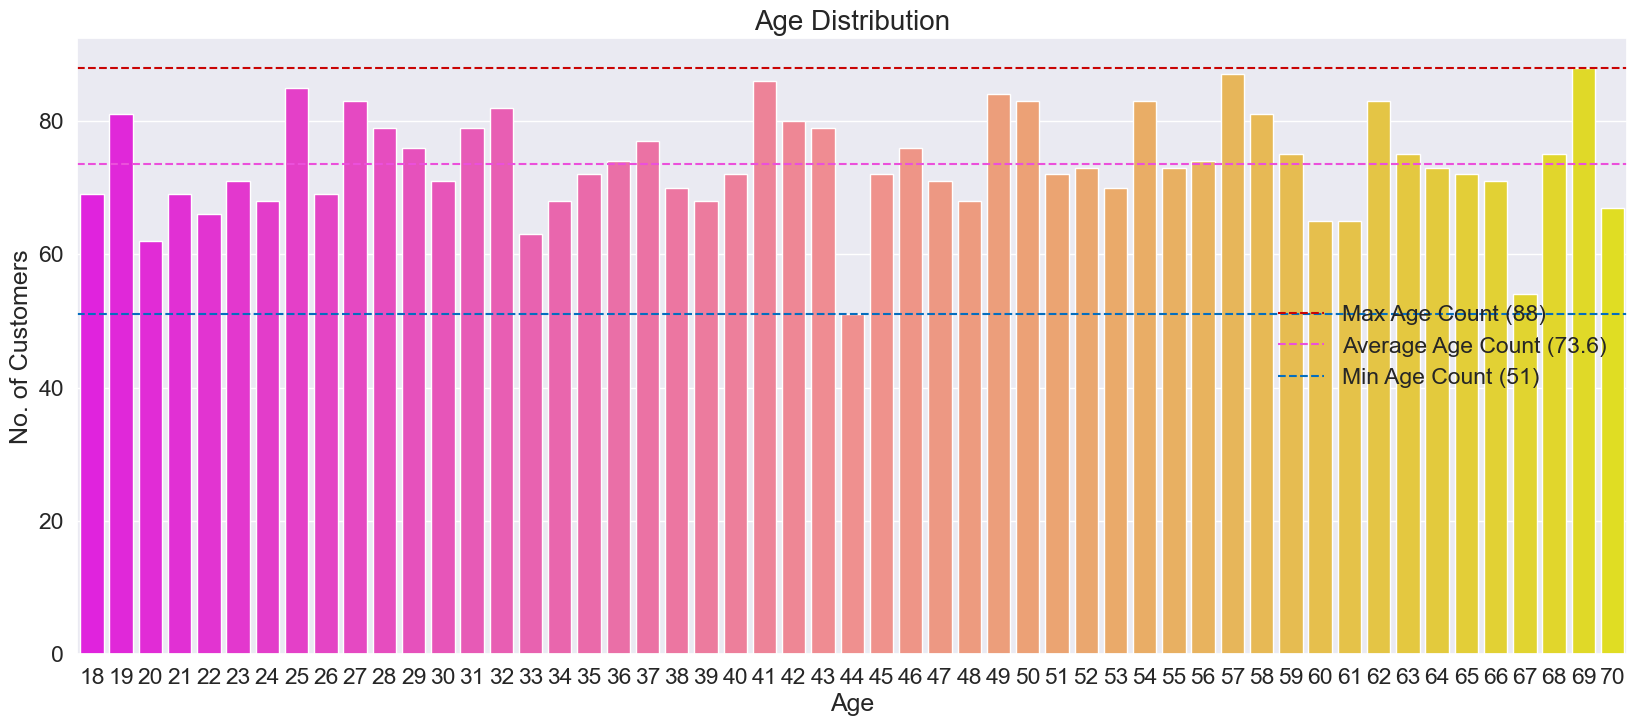

In [86]:
fig, ax = plt.subplots(figsize=(20,8))
sns.set(font_scale=1.5)
ax = sns.countplot(x=data['Age'], palette='spring')
ax.axhline(y=data['Age'].value_counts().max(), linestyle='--',color='#c90404', label=f'Max Age Count ({data.Age.value_counts().max()})')
ax.axhline(y=data['Age'].value_counts().mean(), linestyle='--',color='#eb50db', label=f'Average Age Count ({data.Age.value_counts().mean():.1f})')
ax.axhline(y=data['Age'].value_counts().min(), linestyle='--',color='#046ebf', label=f'Min Age Count ({data.Age.value_counts().min()})')
ax.legend(loc ='right')
ax.set_ylabel('No. of Customers')

plt.title('Age Distribution', fontsize = 20)
plt.show()

###### Gender wise Age Distribution

Statistical Age Distribution of Male customers.

In [87]:
data[data['Gender']=='Male']['Age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Age, dtype: float64

Average Age of Female Customers.

Counts of first five max age count in the Female Customers.

### 6. Analyzing Data  for Modelling

#### 6.1. Analyzing Annual Income data

#### SVM

In [11]:
# 1. Tải thư viện
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 2. Tải dữ liệu
data = pd.read_csv('data/shopping_behavior_updated.csv')

# 3. Mã hóa biến phân loại
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Promo Code Used'] = le.fit_transform(data['Promo Code Used'])

# 4. Chọn đặc trưng và mục tiêu
features = ['Age', 'Gender', 'Purchase Amount (USD)', 'Category', 'Season', 'Review Rating']
target = 'Promo Code Used'
X = data[features]
y = data[target]

# Mã hóa one-hot
X = pd.get_dummies(X, columns=['Category', 'Season'], drop_first=True)

# 5. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# 8. Dự đoán và đánh giá
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác: {accuracy:.4f}')
print('Báo cáo phân loại:')
print(classification_report(y_test, y_pred))

Độ chính xác: 0.7513
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       422
           1       0.65      1.00      0.79       358

    accuracy                           0.75       780
   macro avg       0.82      0.77      0.74       780
weighted avg       0.84      0.75      0.74       780



#### K - Means Clustering

Age                         int64
Purchase Amount (USD)       int64
Previous Purchases          int64
Review Rating             float64
Frequency of Purchases     object
dtype: object


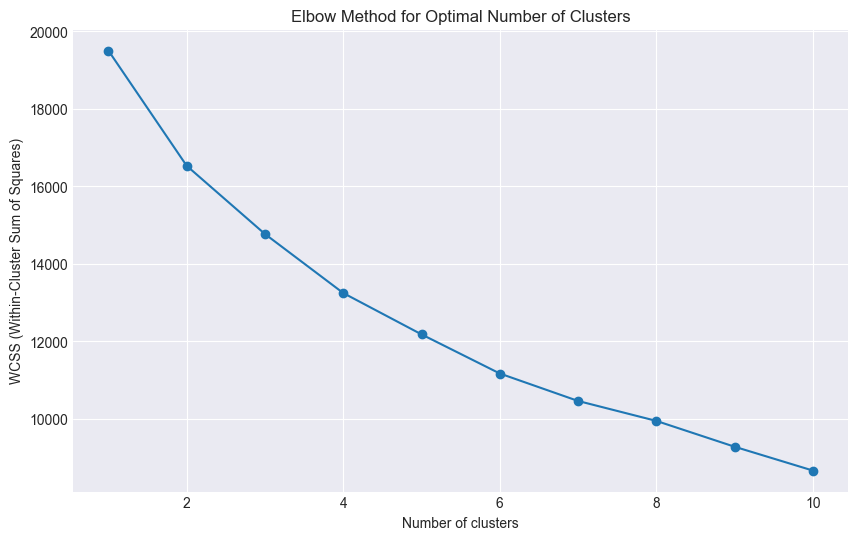

Silhouette Score - K-Means: 0.1479
Davies-Bouldin Index - K-Means: 1.6535


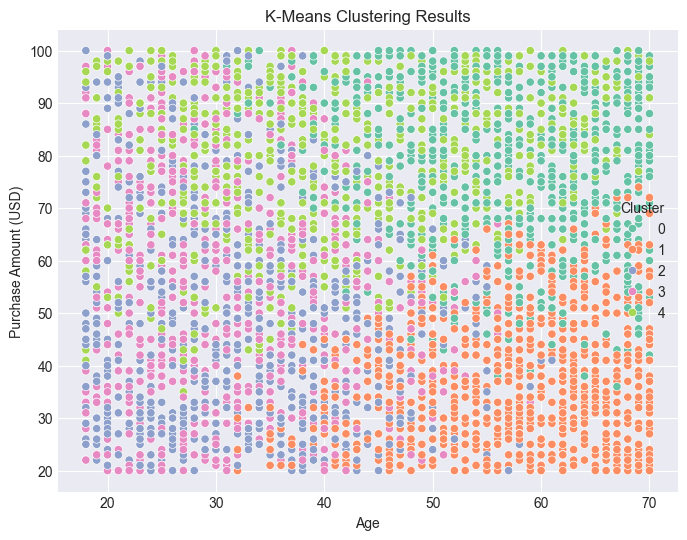

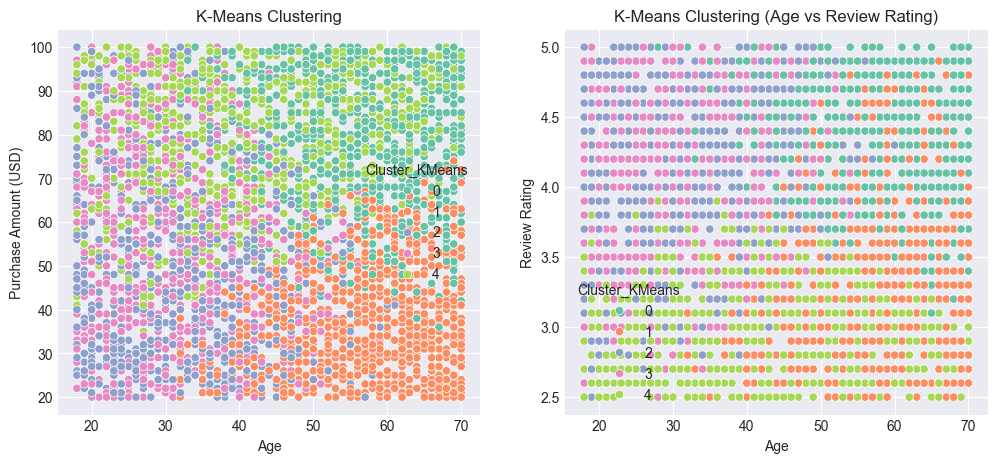

In [35]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Đọc dữ liệu từ tệp CSV
data_path = "data/shopping_behavior_updated.csv"
df = pd.read_csv(data_path)

# Chọn các cột số để phân cụm
selected_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating', 'Frequency of Purchases']

# Kiểm tra kiểu dữ liệu
print(df[selected_columns].dtypes)

# Xử lý cột không phải số
if 'Frequency of Purchases' in df.columns and df['Frequency of Purchases'].dtype == 'object':
    df['Frequency of Purchases'] = LabelEncoder().fit_transform(df['Frequency of Purchases'])

# Giữ lại chỉ các cột số
data = df[selected_columns].select_dtypes(include=['number']).dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Tìm số cụm tối ưu bằng phương pháp Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Áp dụng K-means clustering với số cụm tối ưu
optimal_clusters = 5  # Chọn số cụm từ biểu đồ Elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)
df['Cluster_KMeans'] = clusters_kmeans

# Đánh giá hiệu suất phân cụm
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)

print(f'Silhouette Score - K-Means: {silhouette_kmeans:.4f}')
print(f'Davies-Bouldin Index - K-Means: {davies_bouldin_kmeans:.4f}')

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_KMeans'], palette='Set2')
plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_KMeans'], palette='Set2')
axes[0].set_title('K-Means Clustering')
sns.scatterplot(ax=axes[1], x=df['Age'], y=df['Review Rating'], hue=df['Cluster_KMeans'], palette='Set2')
axes[1].set_title('K-Means Clustering (Age vs Review Rating)')
plt.show()